In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')

import tensorflow.keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation,Dropout,Flatten,Dense

import os
import cv2
from PIL import Image
import numpy as np

In [9]:
image_directory = 'E:/datasets/MalariaCells/training_set/'
SIZE  = 150
datas= []
lab = []

In [ ]:
parasitized_images = os.listdir(image_directory +'Parasitized/')
for i, img_name in enumerate(parasitized_images):
    
    if (img_name.split('.')[1] == 'png'):#image in jpg format
        image = cv2.imread(image_directory+'Parasitized/'+img_name)#cv2 to load image
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        datas.append(np.array(image))
        lab.append(0)#append label 0 to uninfected

In [4]:
uninfected_images = os.listdir(image_directory +'Uninfected/')
for i, img_name in enumerate(uninfected_images):
    
    if (img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory+'Uninfected/'+img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        datas.append(np.array(image))
        lab.append(1)#append label 1 to uninfected

In [5]:
datas = np.array(datas)
lab = np.array(lab)

In [6]:
lab

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
datas, lab, test_size = 0.20, random_state = 0)

In [8]:
#scaling (normalise) of the data from the original range
from keras.utils.np_utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

MemoryError: Unable to allocate 11.1 GiB for an array with shape (22046, 150, 150, 3) and data type float64

In [8]:
INPUT_SIZE = (SIZE, SIZE, 3)

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=INPUT_SIZE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
#sigmoid used for non-mutually exclusive problems
#also good for binary mutually exclusive (pig or not pig)



In [9]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#hyperparameters
#early stopping
jamnyo = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience= 3, verbose = 1, mode = 'auto')

#model check point
george = ModelCheckpoint(monitor="val_accuracy", filepath="E:/datasets/atopicdemat1.h5",verbose= 1, save_best_only=True , mode = 'auto')

x = [jamnyo,george]

In [12]:
history = model.fit(X_train,
                   y_train,
                   batch_size = 64,
                   verbose = 1,
                   epochs = 300,
                   validation_data=(X_test,y_test),
                   shuffle = False,
                   callbacks = x
                   )

Epoch 1/300
40/40 [==============================] - ETA: 0s - loss: 0.4420 - accuracy: 0.8478
Epoch 1: val_accuracy improved from -inf to 0.88160, saving model to E:/datasets\atopicdemat1.h5
40/40 [==============================] - 144s 3s/step - loss: 0.4420 - accuracy: 0.8478 - val_loss: 0.4180 - val_accuracy: 0.8816
Epoch 2/300
40/40 [==============================] - ETA: 0s - loss: 0.2798 - accuracy: 0.8746
Epoch 2: val_accuracy improved from 0.88160 to 0.91200, saving model to E:/datasets\atopicdemat1.h5
40/40 [==============================] - 79s 2s/step - loss: 0.2798 - accuracy: 0.8746 - val_loss: 0.2113 - val_accuracy: 0.9120
Epoch 3/300
39/40 [============================>.] - ETA: 1s - loss: 0.2130 - accuracy: 0.8914
Epoch 3: val_accuracy improved from 0.91200 to 0.91840, saving model to E:/datasets\atopicdemat1.h5
40/40 [==============================] - 52s 1s/step - loss: 0.2131 - accuracy: 0.8915 - val_loss: 0.1806 - val_accuracy: 0.9184
Epoch 4/300
40/40 [===========

In [13]:
r = history.history
r.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

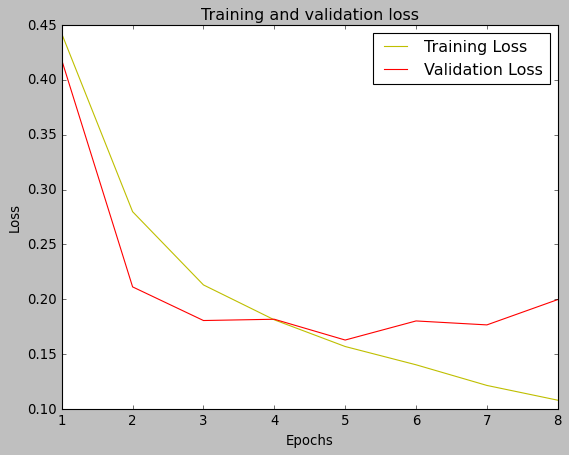

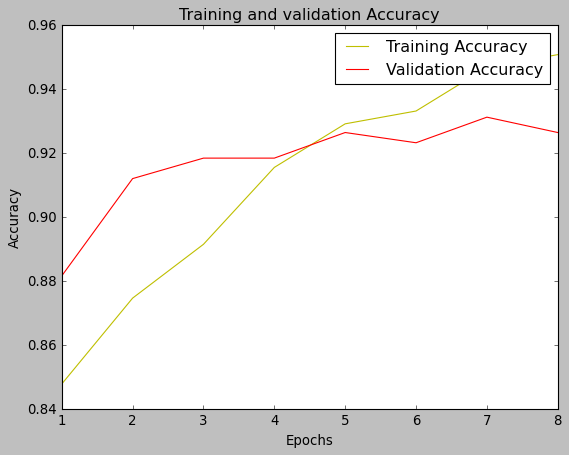

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The prediction for this image is:  [[0.7971107]]
The actual label for this image is: Infected


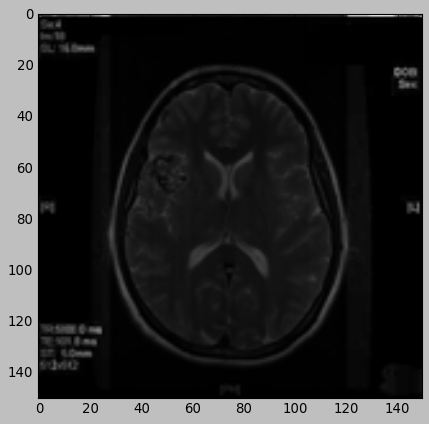

In [15]:
n = 308
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
print("The prediction for this image is: ", model.predict(input_img))
pred = y_test[n]
if pred == 0:
    print("The actual label for this image is: Healthy")
else:
    print("The actual label for this image is: Infected")

In [16]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

20/20 [==============================] - 6s 275ms/step - loss: 0.1997 - accuracy: 0.9264
Accuracy =  92.64000058174133 %


In [17]:
for i in range(1, len(X_test)):
    img = X_test[i]
    print("Index= ",i,"Image_shape= ",X_test[i].shape,"Label = ",y_test[i])

Index=  1 Image_shape=  (150, 150, 3) Label =  0
Index=  2 Image_shape=  (150, 150, 3) Label =  0
Index=  3 Image_shape=  (150, 150, 3) Label =  1
Index=  4 Image_shape=  (150, 150, 3) Label =  1
Index=  5 Image_shape=  (150, 150, 3) Label =  0
Index=  6 Image_shape=  (150, 150, 3) Label =  0
Index=  7 Image_shape=  (150, 150, 3) Label =  0
Index=  8 Image_shape=  (150, 150, 3) Label =  0
Index=  9 Image_shape=  (150, 150, 3) Label =  1
Index=  10 Image_shape=  (150, 150, 3) Label =  1
Index=  11 Image_shape=  (150, 150, 3) Label =  0
Index=  12 Image_shape=  (150, 150, 3) Label =  0
Index=  13 Image_shape=  (150, 150, 3) Label =  0
Index=  14 Image_shape=  (150, 150, 3) Label =  1
Index=  15 Image_shape=  (150, 150, 3) Label =  0
Index=  16 Image_shape=  (150, 150, 3) Label =  0
Index=  17 Image_shape=  (150, 150, 3) Label =  0
Index=  18 Image_shape=  (150, 150, 3) Label =  0
Index=  19 Image_shape=  (150, 150, 3) Label =  0
Index=  20 Image_shape=  (150, 150, 3) Label =  0
Index=  2

Test Model

In [70]:
from keras.models import load_model

model = load_model("E:\datasets/atopicdemat1.h5")

In [82]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image

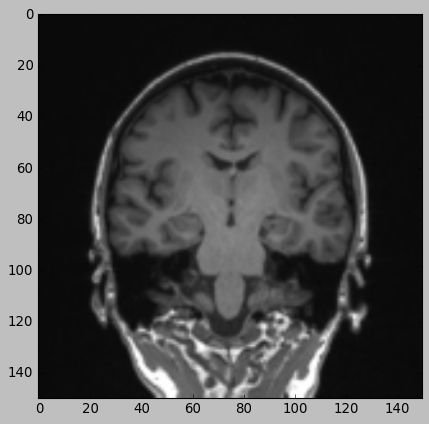

The prediction for this image is:  [[1.]]
Healthy


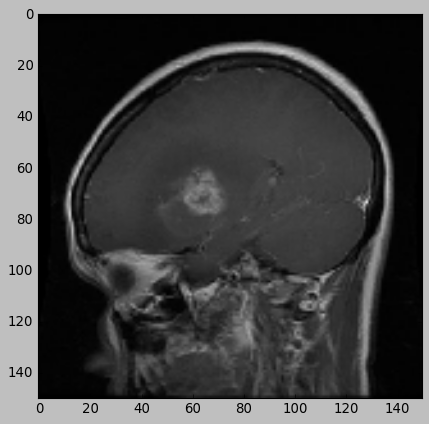

The prediction for this image is:  [[0.]]
Tumor Detected


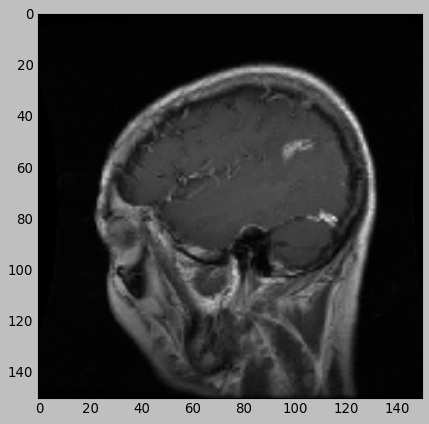

The prediction for this image is:  [[0.]]
Tumor Detected


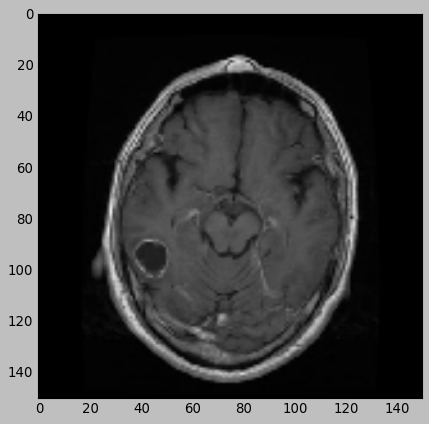

The prediction for this image is:  [[1.]]
Healthy


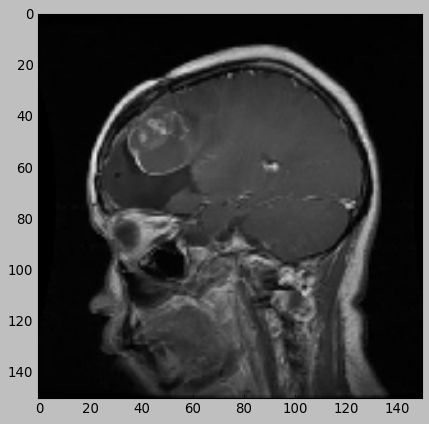

The prediction for this image is:  [[0.]]
Tumor Detected


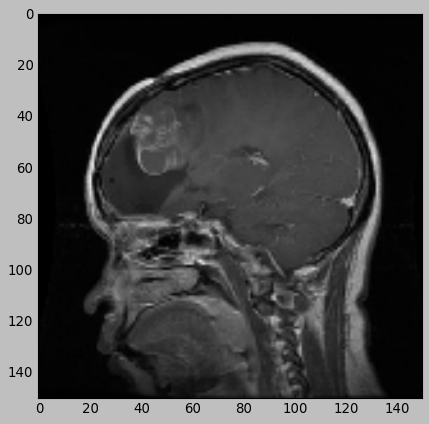

The prediction for this image is:  [[0.]]
Tumor Detected


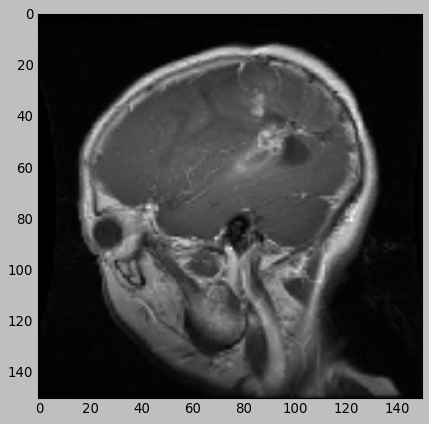

The prediction for this image is:  [[0.]]
Tumor Detected


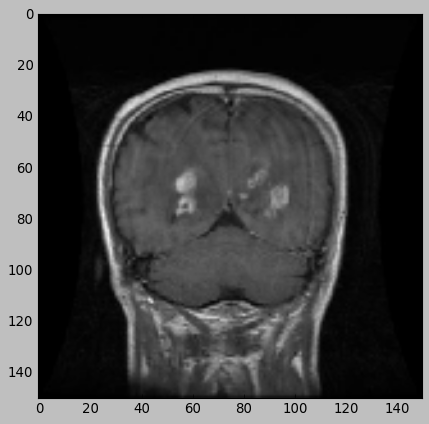

The prediction for this image is:  [[1.]]
Healthy


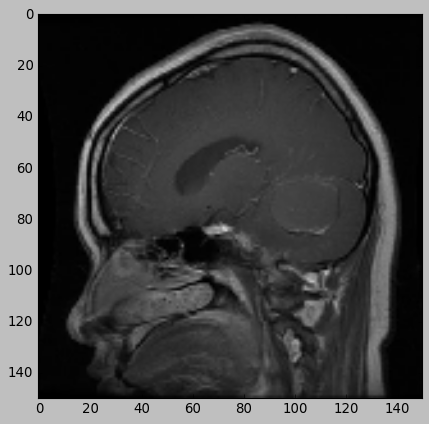

The prediction for this image is:  [[0.]]
Tumor Detected


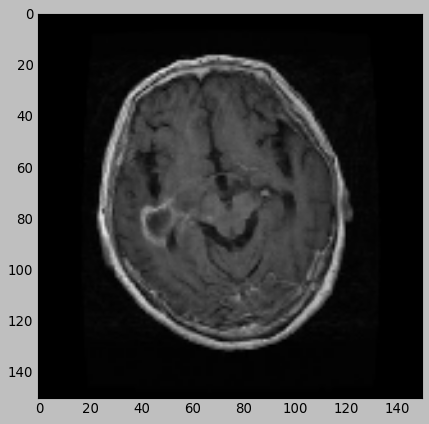

The prediction for this image is:  [[1.]]
Healthy


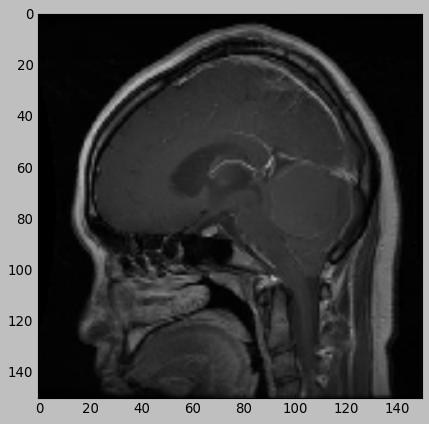

The prediction for this image is:  [[5.6612226e-09]]
Tumor Detected


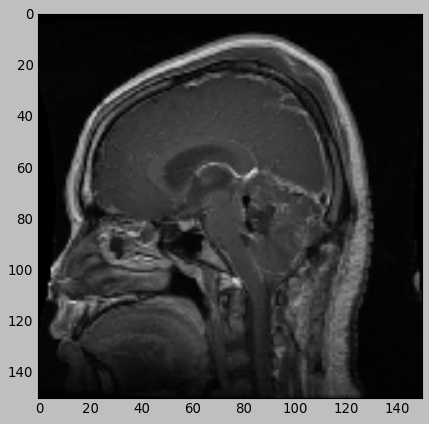

The prediction for this image is:  [[0.]]
Tumor Detected


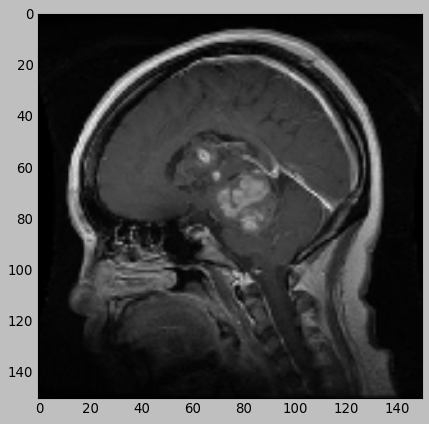

The prediction for this image is:  [[0.]]
Tumor Detected


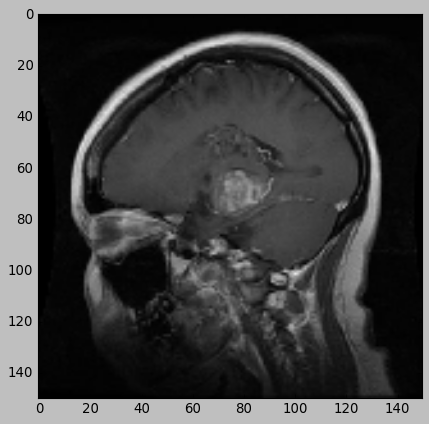

The prediction for this image is:  [[0.]]
Tumor Detected


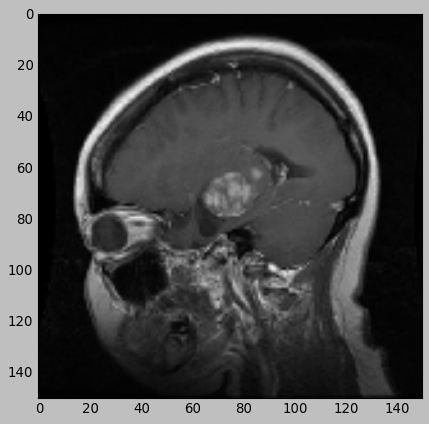

The prediction for this image is:  [[0.]]
Tumor Detected


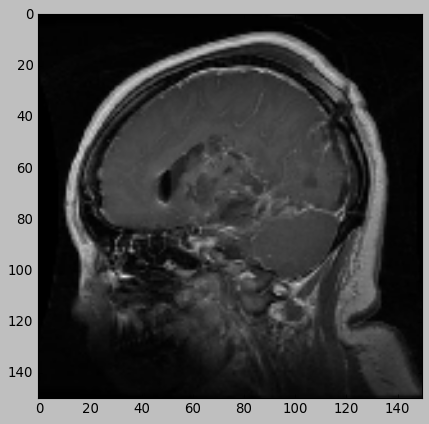

The prediction for this image is:  [[0.]]
Tumor Detected


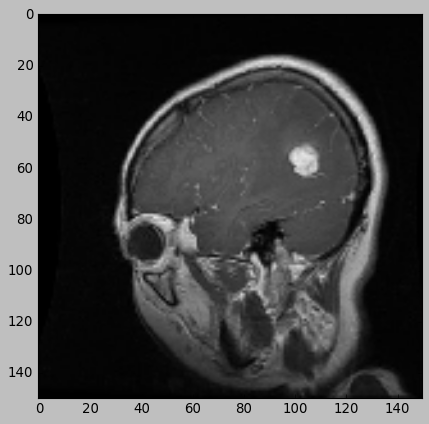

The prediction for this image is:  [[0.]]
Tumor Detected


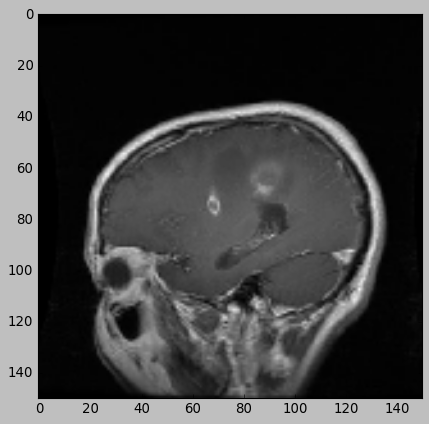

The prediction for this image is:  [[0.]]
Tumor Detected


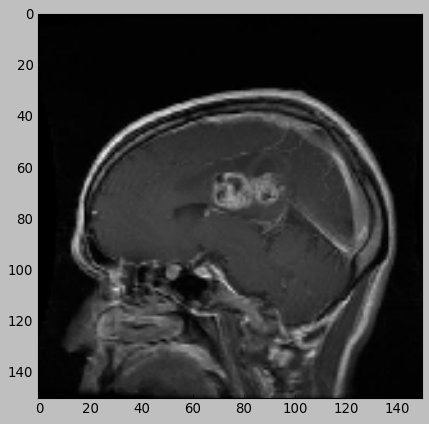

The prediction for this image is:  [[0.]]
Tumor Detected


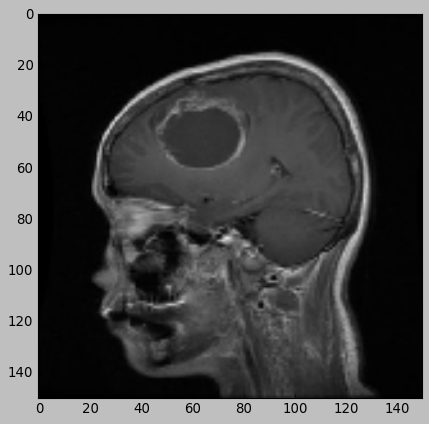

The prediction for this image is:  [[0.]]
Tumor Detected


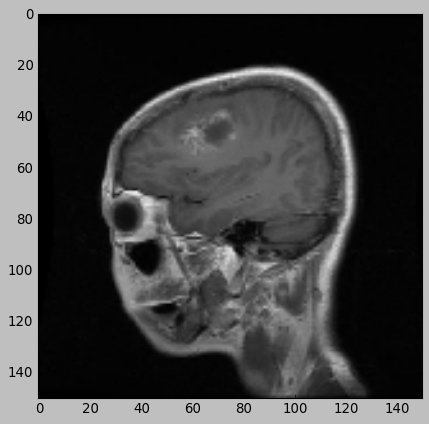

The prediction for this image is:  [[1.]]
Healthy


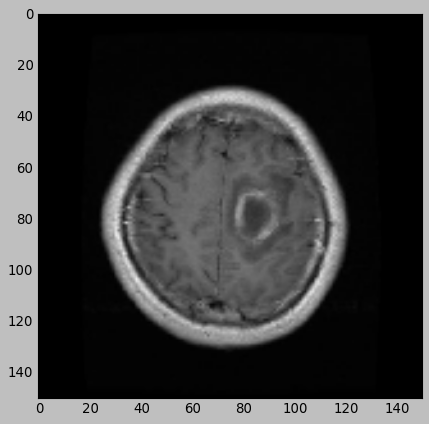

The prediction for this image is:  [[1.]]
Healthy


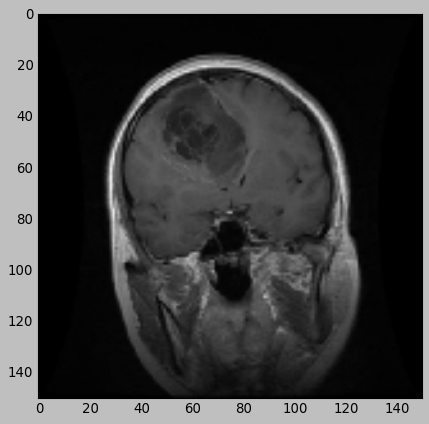

The prediction for this image is:  [[1.]]
Healthy


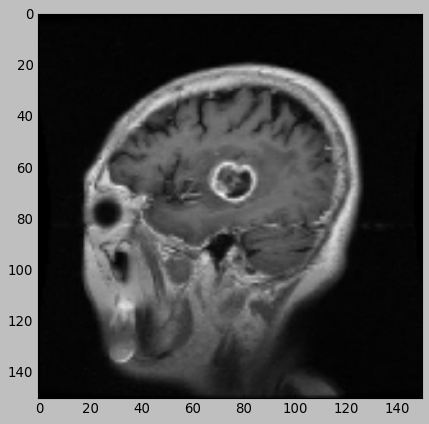

The prediction for this image is:  [[0.]]
Tumor Detected


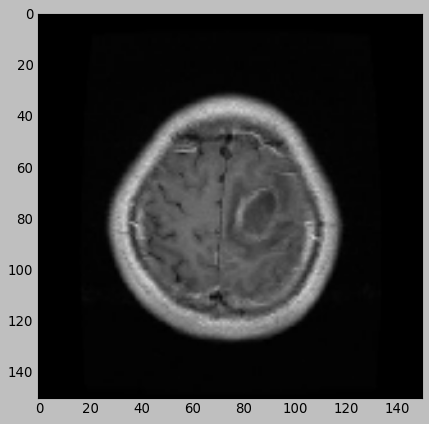

The prediction for this image is:  [[1.]]
Healthy


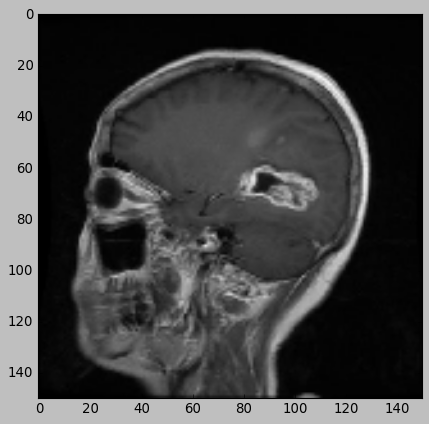

The prediction for this image is:  [[0.]]
Tumor Detected


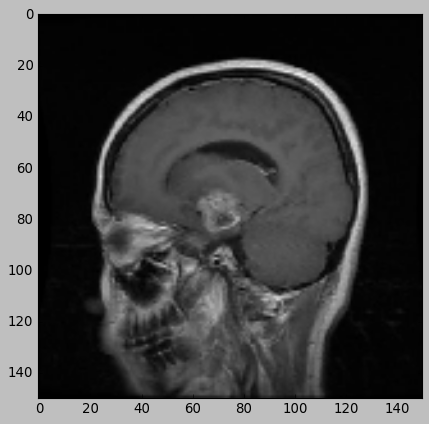

The prediction for this image is:  [[3.0815472e-36]]
Tumor Detected


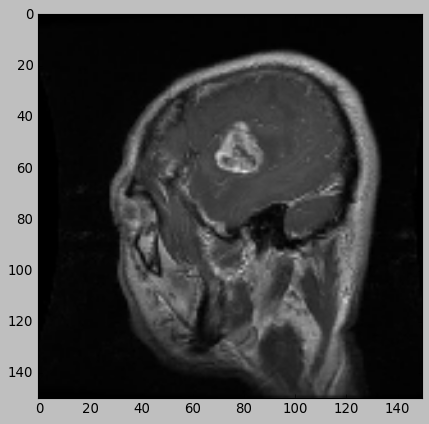

The prediction for this image is:  [[0.]]
Tumor Detected


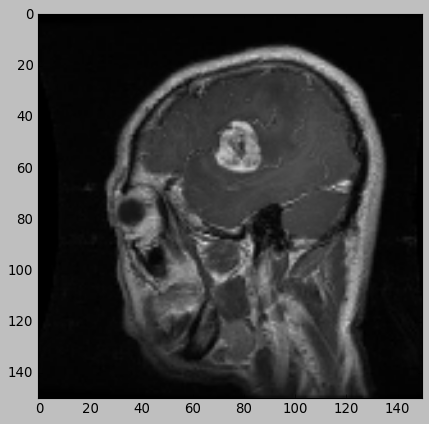

The prediction for this image is:  [[0.]]
Tumor Detected


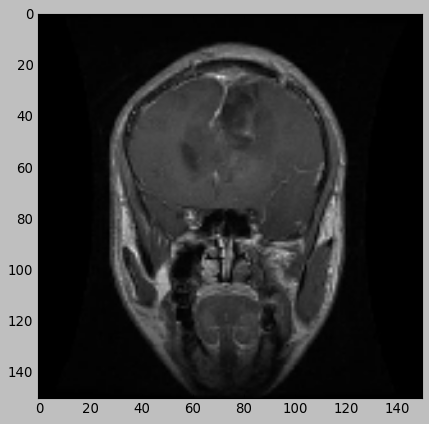

The prediction for this image is:  [[1.]]
Healthy


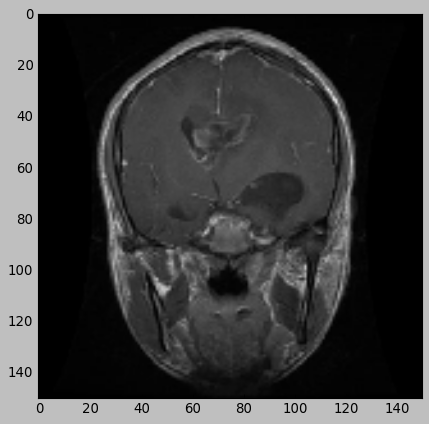

The prediction for this image is:  [[1.]]
Healthy


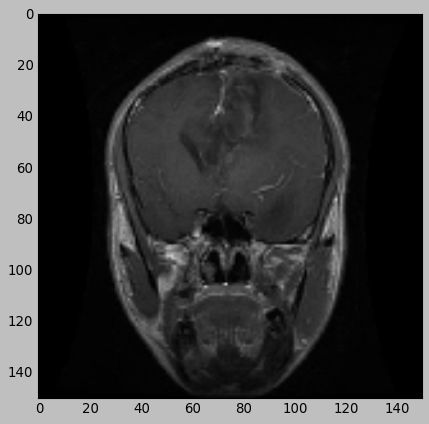

The prediction for this image is:  [[1.]]
Healthy


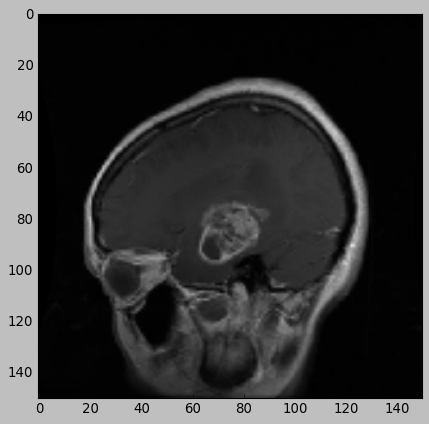

The prediction for this image is:  [[0.]]
Tumor Detected


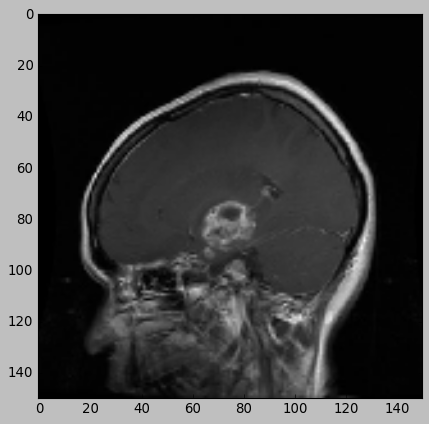

The prediction for this image is:  [[0.]]
Tumor Detected


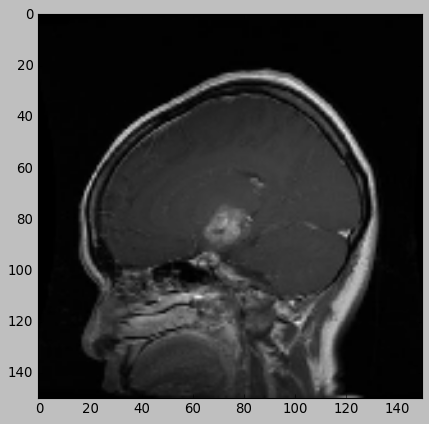

The prediction for this image is:  [[0.]]
Tumor Detected


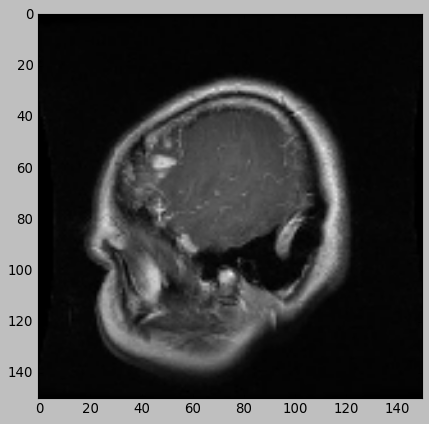

The prediction for this image is:  [[1.]]
Healthy


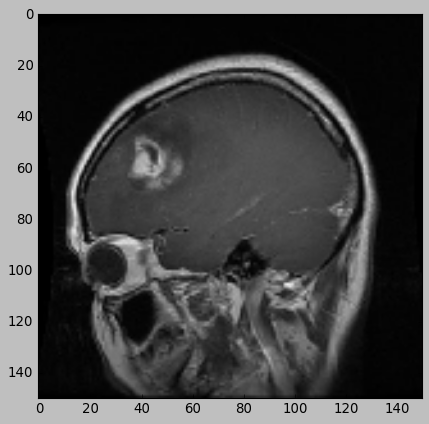

The prediction for this image is:  [[0.]]
Tumor Detected


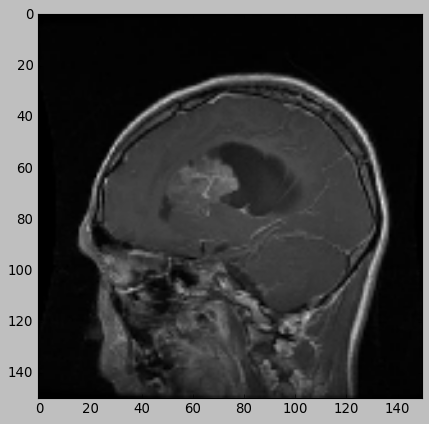

The prediction for this image is:  [[0.]]
Tumor Detected


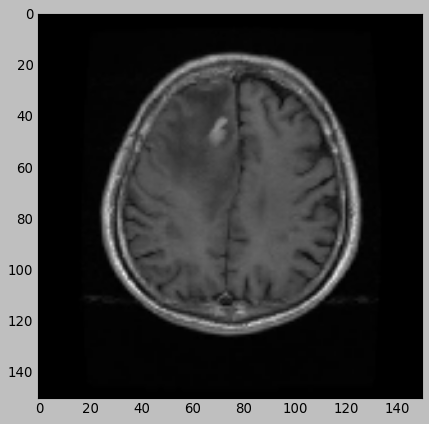

The prediction for this image is:  [[1.]]
Healthy


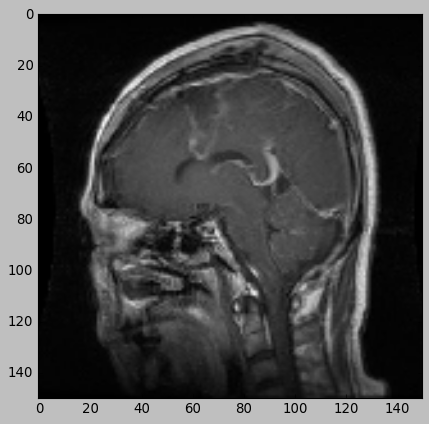

The prediction for this image is:  [[0.]]
Tumor Detected


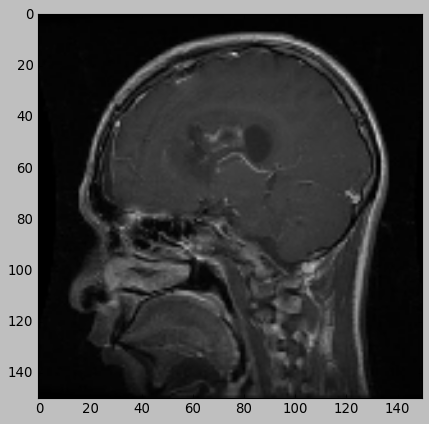

The prediction for this image is:  [[1.]]
Healthy


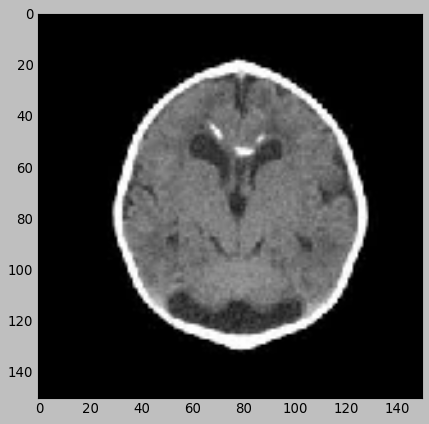

The prediction for this image is:  [[0.]]
Tumor Detected


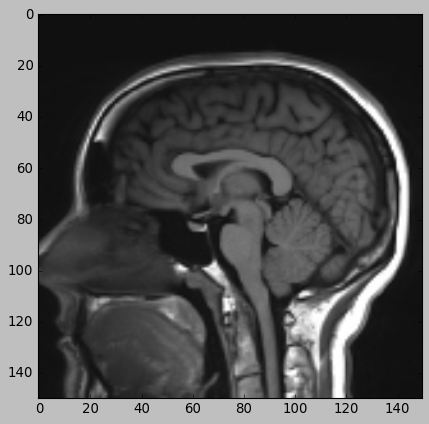

The prediction for this image is:  [[1.]]
Healthy


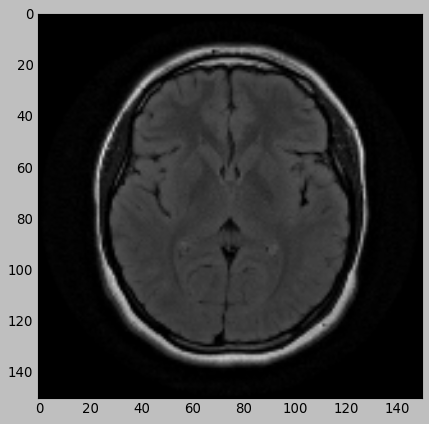

The prediction for this image is:  [[1.]]
Healthy


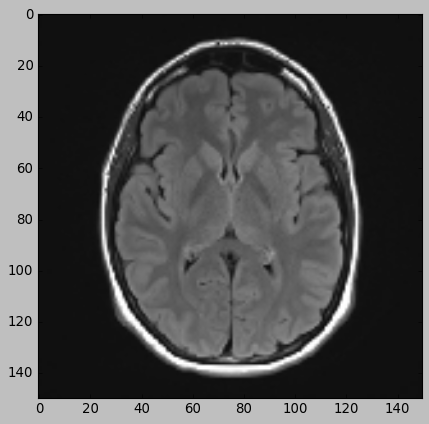

The prediction for this image is:  [[1.]]
Healthy


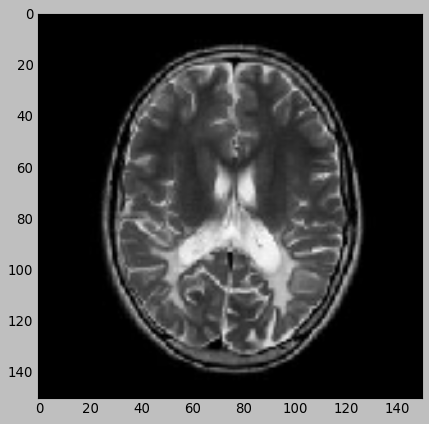

The prediction for this image is:  [[1.]]
Healthy


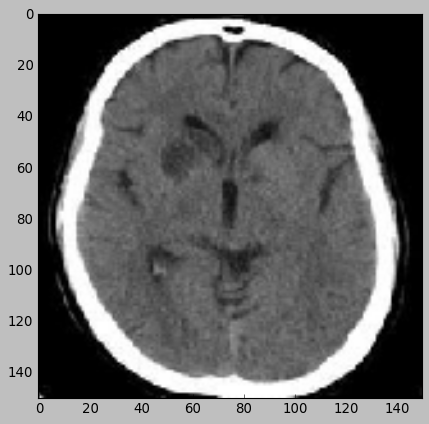

The prediction for this image is:  [[0.]]
Tumor Detected


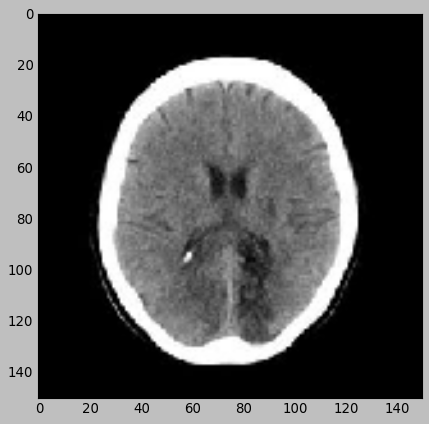

The prediction for this image is:  [[1.]]
Healthy


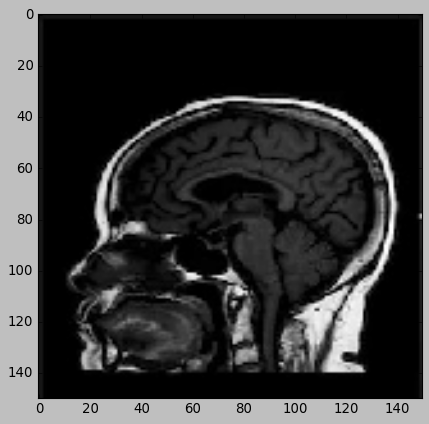

The prediction for this image is:  [[1.]]
Healthy


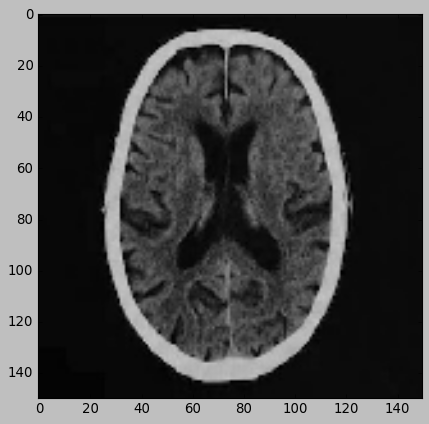

The prediction for this image is:  [[1.]]
Healthy


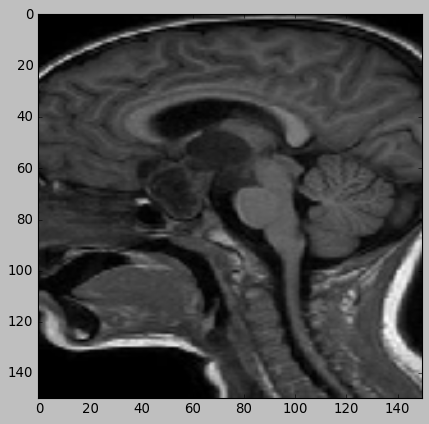

The prediction for this image is:  [[0.]]
Tumor Detected


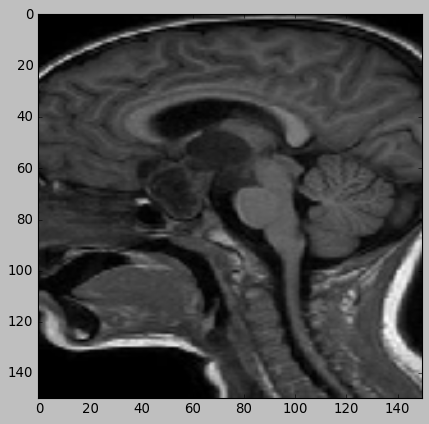

The prediction for this image is:  [[0.]]
Tumor Detected


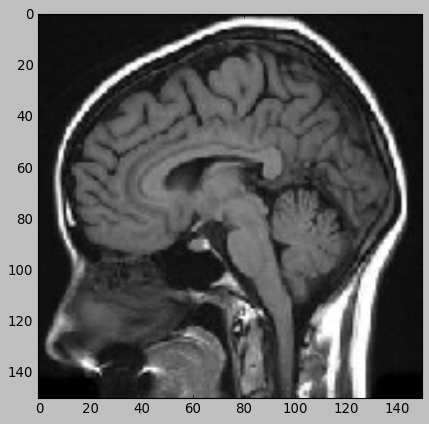

The prediction for this image is:  [[1.]]
Healthy


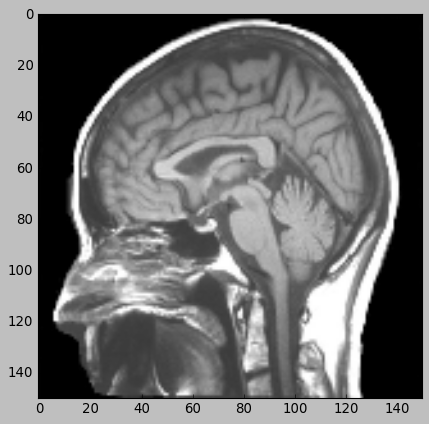

The prediction for this image is:  [[1.]]
Healthy


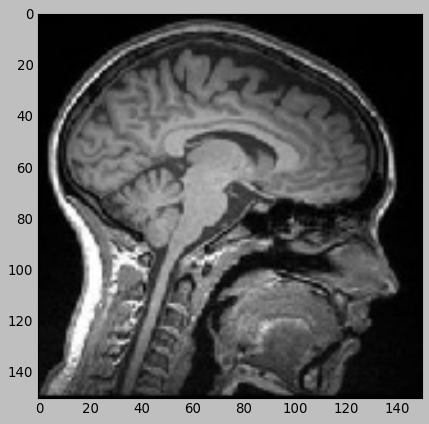

The prediction for this image is:  [[1.]]
Healthy


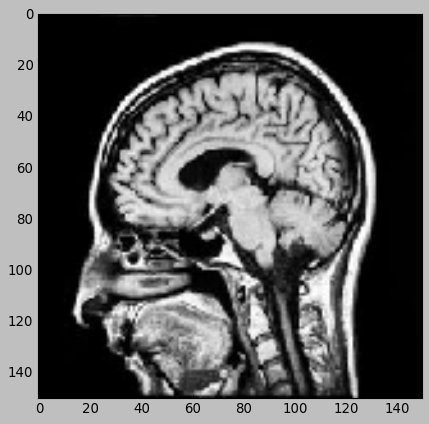

The prediction for this image is:  [[1.]]
Healthy


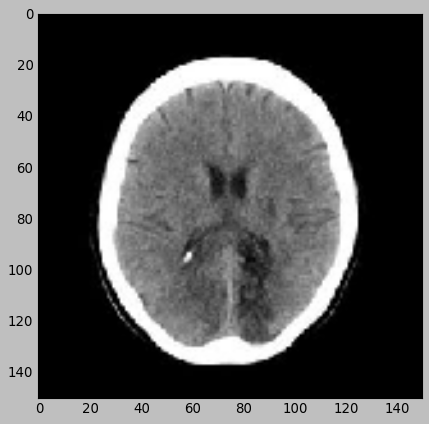

The prediction for this image is:  [[1.]]
Healthy


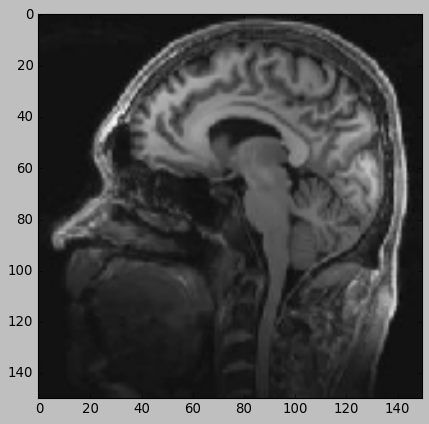

The prediction for this image is:  [[1.]]
Healthy


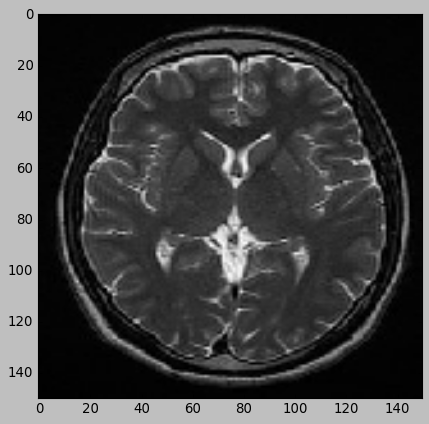

The prediction for this image is:  [[1.]]
Healthy


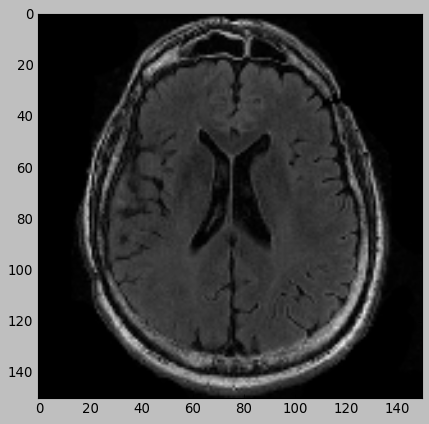

The prediction for this image is:  [[1.]]
Healthy


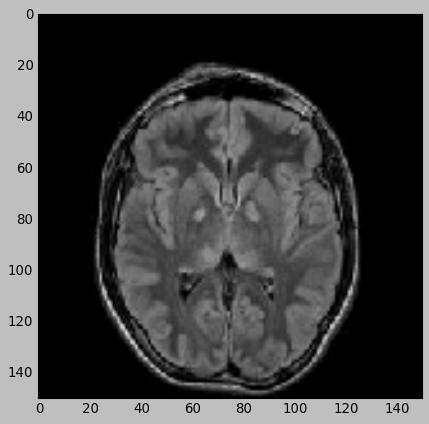

The prediction for this image is:  [[1.]]
Healthy


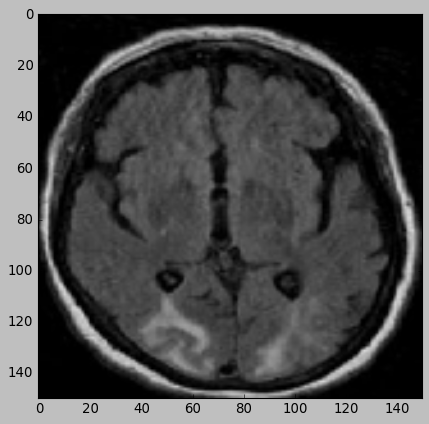

The prediction for this image is:  [[1.]]
Healthy


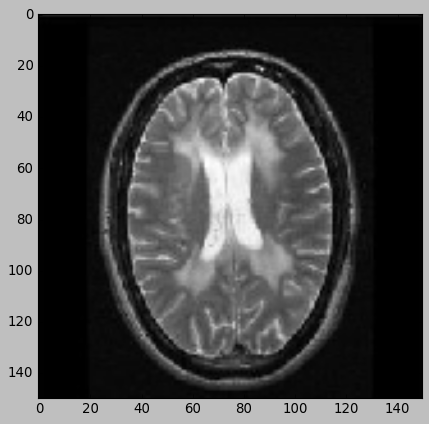

The prediction for this image is:  [[1.]]
Healthy


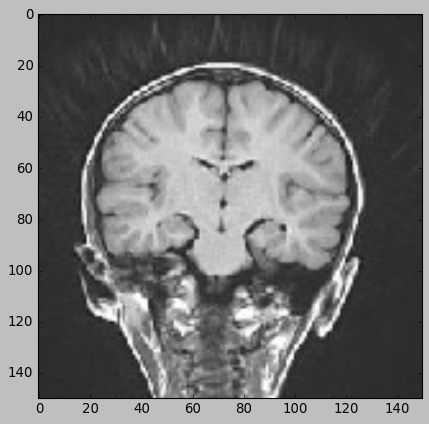

The prediction for this image is:  [[1.]]
Healthy


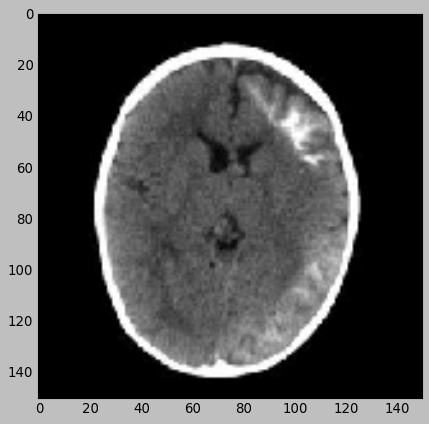

The prediction for this image is:  [[1.]]
Healthy


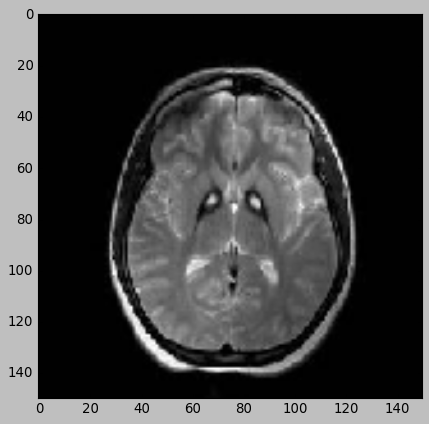

The prediction for this image is:  [[1.]]
Healthy


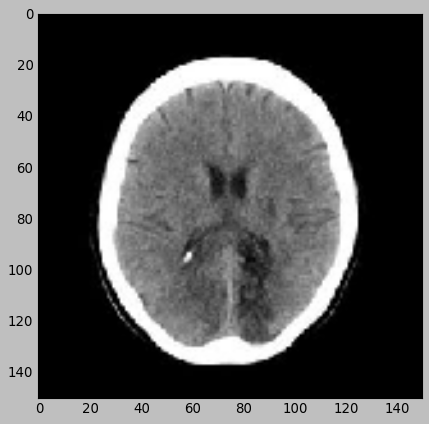

The prediction for this image is:  [[1.]]
Healthy


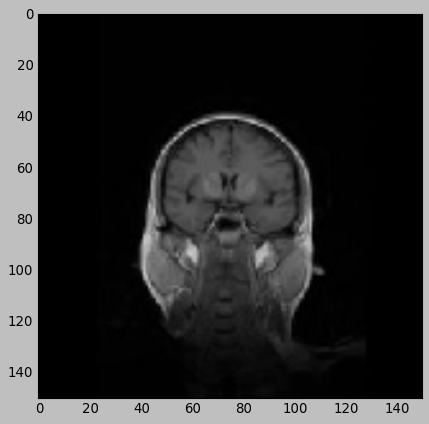

The prediction for this image is:  [[1.]]
Healthy


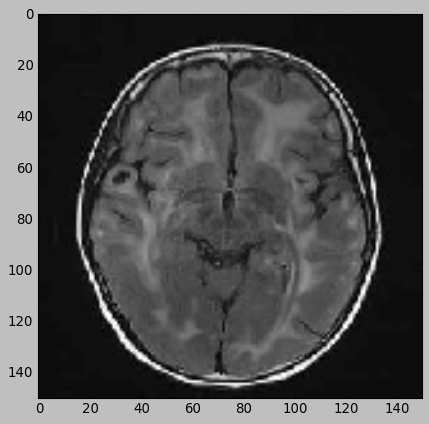

The prediction for this image is:  [[5.2721258e-15]]
Tumor Detected


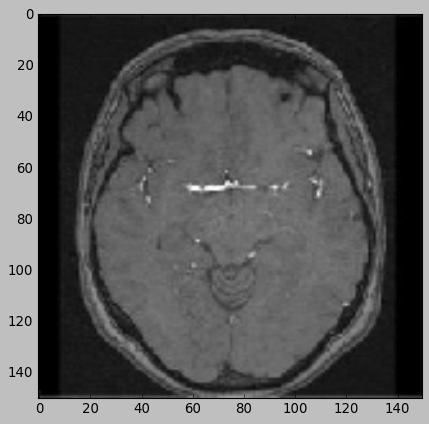

The prediction for this image is:  [[4.426224e-34]]
Tumor Detected


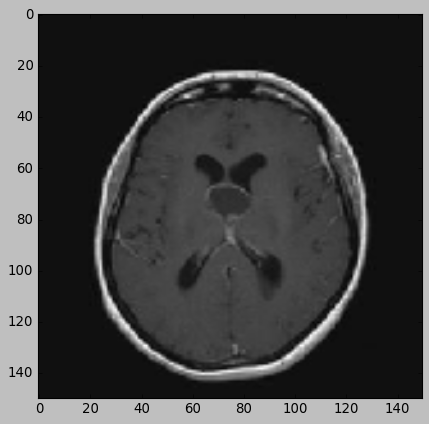

The prediction for this image is:  [[1.]]
Healthy


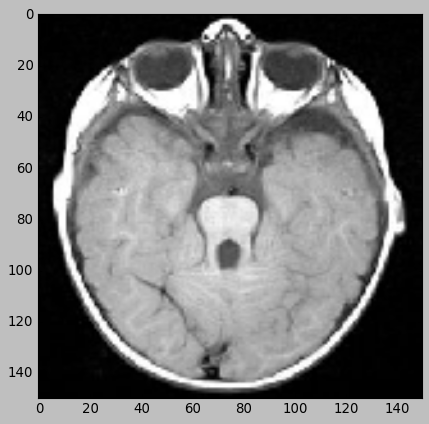

The prediction for this image is:  [[0.]]
Tumor Detected


In [84]:
dir_path = 'E:/datasets/basedata'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+ i,target_size=(150,150))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)#convert image to array
    X = np.expand_dims(X,axis = 0)#convert image to numpy array
    images = np.vstack([X])
    val = model.predict(images)
    
    print("The prediction for this image is: ", model.predict(images))
    
    if val > 0.5:
        print("Healthy")
    else:
        print("Tumor Detected")
        

Confusion Matrix and ROC

In [26]:
threshold = 0.5
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>=threshold).astype(int)
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[510  18]
 [ 28  69]]


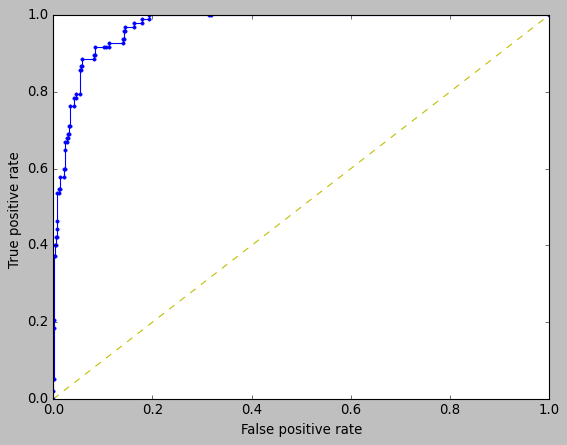

In [19]:
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0,1],[0,1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate ')
plt.show()

In [21]:
import pandas as pd
x = np.arange(len(tpr))
roc = pd.DataFrame({'tf': pd.Series(tpr-(1-fpr), index=x),
                   'thresholds' : pd.Series(thresholds, index=x)})

ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

print("Ideal threshold is: ",  ideal_roc_thresh['thresholds'])

Ideal threshold is:  45    0.041144
Name: thresholds, dtype: float32


In [24]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve: ", auc_value)

Area under curve:  0.9710442049359576


Convert Model To tflite

In [1]:
path = "E:\datasets/atopicdemat1.h5"

In [3]:
from keras.models import load_model
import tensorflow as tf

model = load_model(path)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

print("successfuly converted model to tflite")

with open('E:\datasets/model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\XERXES~1\AppData\Local\Temp\tmps097uwwv\assets


INFO:tensorflow:Assets written to: C:\Users\XERXES~1\AppData\Local\Temp\tmps097uwwv\assets


successfuly converted model to tflite
